In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipc_module
import os

This code is for analyzing the narma task and its ipc value
1. IPC of the idel outputs
2. IPC of the RC system outputs with or without ac current
3. IPC of the RC under different input ratio
4. IPC of the RC reservoir states under different input ratio


In [2]:
# define the input ratio
length_signals = 20000
posibility_0_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for posibility_0 in posibility_0_list:
    s_in = np.random.choice([0, 1], size=length_signals, p=[posibility_0, 1-posibility_0])
    s_in = 0.2*s_in

    # Narma10
    # train_signal = 0.2*np.random.choice([-1, 1], size=9, p=[posibility_0, 1-posibility_0])
    # for super_value in range(9, len(s_in)):
    #     temp_signal = 0.3*train_signal[super_value-1] + 0.04*train_signal[super_value-1]*(
    #         train_signal[super_value-2] + train_signal[super_value-3] + train_signal[super_value-4] + train_signal[super_value-5] + 
    #         train_signal[super_value-6] + train_signal[super_value-7] + train_signal[super_value-8] + train_signal[super_value-9]) + 1.5*s_in[super_value-1]*s_in[super_value-9] + 0.1
    #     train_signal = np.append(train_signal, temp_signal)

    # Narma5 wash data
    # train_signal = np.random.choice([-1, 1], size=5, p=[posibility_0, 1-posibility_0])
    # for super_value in range(5, len(s_in)):
    #     temp_signal = 0.3*train_signal[super_value-1] + 0.04*train_signal[super_value-1]*(
    #         train_signal[super_value-2] + train_signal[super_value-3] + train_signal[super_value-4] + train_signal[super_value-5]) + 1.5*s_in[super_value-1]*s_in[super_value-5] + 0.1
    #     train_signal = np.append(train_signal, temp_signal)

    # train_signal = train_signal[-5:]
    # for super_value in range(5, len(s_in)):
    #     temp_signal = 0.3*train_signal[super_value-1] + 0.04*train_signal[super_value-1]*(
    #         train_signal[super_value-2] + train_signal[super_value-3] + train_signal[super_value-4] + train_signal[super_value-5]) + 1.5*s_in[super_value-1]*s_in[super_value-5] + 0.1
    #     train_signal = np.append(train_signal, temp_signal)

    # NARMA3
    # ratio = posibility_0
    # train_signal = 0.2*np.random.choice([-1, 1], size=3, p=[ratio, 1-ratio])
    # for super_value in range(3, len(s_in)):
    #     temp_signal = 0.3*train_signal[super_value-1] + 0.04*train_signal[super_value-1]*(
    #         train_signal[super_value-2] + train_signal[super_value-3]) + 1.5*s_in[super_value-1]*s_in[super_value-3] + 0.1
    #     train_signal = np.append(train_signal, temp_signal)
    # train_signal = train_signal[-3:]
    # for super_value in range(3, len(s_in)):
    #     temp_signal = 0.3*train_signal[super_value-1] + 0.04*train_signal[super_value-1]*(
    #         train_signal[super_value-2] + train_signal[super_value-3]) + 1.5*s_in[super_value-1]*s_in[super_value-3] + 0.1
    #     train_signal = np.append(train_signal, temp_signal)

    # NARMA2
    train_signal = 0.2*np.ones(2)
    for super_value in range(2, len(s_in)):
        temp_signal = 0.4*train_signal[super_value-1] + 0.4*train_signal[super_value-1]*train_signal[super_value-2] + 0.6*np.power(s_in[super_value-1], 3) + 0.1
        train_signal = np.append(train_signal, temp_signal)
    train_signal = train_signal[-2:]
    for super_value in range(2, len(s_in)):
        temp_signal = 0.4*train_signal[super_value-1] + 0.4*train_signal[super_value-1]*train_signal[super_value-2] + 0.6*np.power(s_in[super_value-1], 3) + 0.1
        train_signal = np.append(train_signal, temp_signal)
    print(train_signal[:30])
    delay_degree_list = [[1, 200], [2, 100], [3, 20], [4, 20], [5, 10], [6, 10], [7, 10], [8, 10]]
    # delay_degree_list = [[1, 200], [2, 100], [3, 20], [4, 20]]
    reservoirs = train_signal[10000:].T.reshape(10000, 1)
    # print(reservoirs, reservoirs.shape)
    for degree_ipc, max_delay_ipc in delay_degree_list:
        ipc_analyze = ipc_module.ipc(
                    washtime=10000, s_in=s_in, reservoir_states=reservoirs, N_binomial=1, p_binomial=posibility_0,
                    distribution_in='bernoulli', degree=degree_ipc, max_delay=max_delay_ipc, scale_factor=3
                    )
        ipc_list = ipc_analyze.thresold()
        # ipc_analyze.save_ipc(path=f'NARMA_ideal_/{posibility_0}', remark='Narma2')
        print('degree', degree_ipc, 'delay', max_delay_ipc, 'ipc', np.sum(ipc_list))

[0.20032486 0.20091644 0.201266   0.20148146 0.19681313 0.19938693
 0.20025156 0.20087164 0.2012386  0.20146469 0.20160287 0.20168749
 0.20173931 0.20177104 0.20179048 0.20180238 0.20180967 0.20181414
 0.20181687 0.20181855 0.20181957 0.2018202  0.20182059 0.20182082
 0.20182097 0.20182106 0.20182111 0.20182114 0.20182116 0.20182118]
Loading the delay-degree sets
(10000, 1)
rank of reservoir 1
initialize ...


Output()

In [ ]:
# define ipc moduel of ideal output
delay_degree_list = [[1, 200], [2, 100], [3, 20], [4, 20], [5, 10], [6, 10], [7, 10], [8, 10]]
# delay_degree_list = [[1, 200], [2, 100], [3, 20], [4, 20]]
reservoirs = train_signal[10000:].T.reshape(10000, 1)
# print(reservoirs, reservoirs.shape)
for degree_ipc, max_delay_ipc in delay_degree_list:
    ipc_analyze = ipc_module.ipc(
                washtime=10000, s_in=s_in, reservoir_states=reservoirs, N_binomial=1, p_binomial=posibility_0,
                distribution_in='bernoulli', degree=degree_ipc, max_delay=max_delay_ipc, scale_factor=3
                )
    ipc_list = ipc_analyze.thresold()
    ipc_analyze.save_ipc(path=f'NARMA_ideal_/{posibility_0}', remark='Narma5')
    print('degree', degree_ipc, 'delay', max_delay_ipc, 'ipc', np.sum(ipc_list))

In [ ]:
# data process for ideal narma ipc
delay_degree_list = [[1, 200], [2, 100], [3, 20], [4, 20], [5, 10], [6, 10], [7, 10], [8, 10]]
# delay_degree_list = [[2, 100]]
node_list = [30]
evolution_time = 4e-9
ratio_list = np.round(np.linspace(0.1, 0.9, 9), 1)
# ratio_list = [0.1]
ac_list = np.linspace(1, 100, 100, dtype=int)
# fig_save_path = 'figs/ipc_elements'
# if not os.path.exists(fig_save_path):
#     os.makedirs(fig_save_path)
task_list = [2, 3, 5]
for task in task_list:
    for ratio in ratio_list:
        for degree, delay in delay_degree_list:
            data_whole = {}
            if os.path.exists(f'NARMA_ideal_/ratio_{ratio}_degree_{degree}_delay_{delay}_Narma{task}.csv'):
                continue
            for ac_value in ac_list:
                data_path = f'NARMA_ideal_/{ratio}/summary_test_degree_{degree}_delay_{delay}_bernoulli_Narma{task}.csv'
                data = pd.read_csv(data_path)
                if ac_value == ac_list[0]:
                    list_name = data['degree_delay_sets'].values
                    real_delay_degree_sets = []
                    for index_ in range(len(list_name)):
                        temp = [i for i in list(list_name[index_]) if i != '[' and i!=']' and i!=',']
                        temp = [int(i) for i in ''.join(temp).split(' ')]
                        temp_whole = []
                        for index_more in range(1, len(temp)):
                            if temp[index_more] != 0 and temp[index_more-1] != 0 and (index_more%2)==1:
                                temp_another = [temp[index_more-1], temp[index_more]]
                                temp_whole.append(temp_another)
                        real_delay_degree_sets.append(temp_whole)
                        # print(real_delay_degree_sets)
                        # print(temp)
                    data_whole['degree_delay_sets'] = real_delay_degree_sets
                data_whole[f'ac_{ac_value}'] = data['c_thresold_list'].values
            df = pd.DataFrame(data_whole)
            df.to_csv(f'NARMA_ideal_/ratio_{ratio}_degree_{degree}_delay_{delay}_Narma{task}.csv')

all long 0.4693101793794532
test performance: 0.47383108103950217, ratio: 0.5, task: Narma2, ac: 1
performance [0.49696324 0.46915742 0.47018333 0.46159127 0.44226626 0.49390995
 0.44946119 0.49062382 0.47614511 0.48800921]


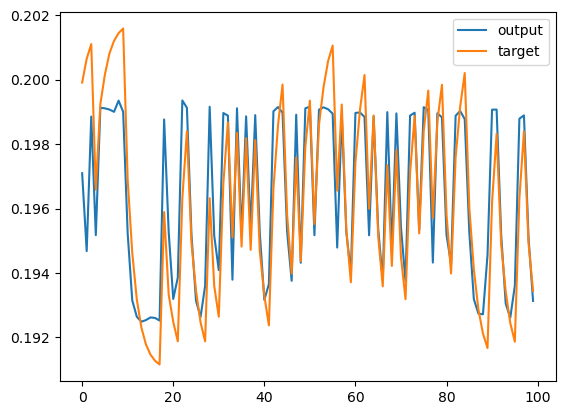

all long 0.49060922669630885
test performance: 0.49304996251418143, ratio: 0.5, task: Narma2, ac: 30
performance [0.57703151 0.46877897 0.49521735 0.46481133 0.51784674 0.45431242
 0.44252537 0.50365514 0.50564571 0.50067509]


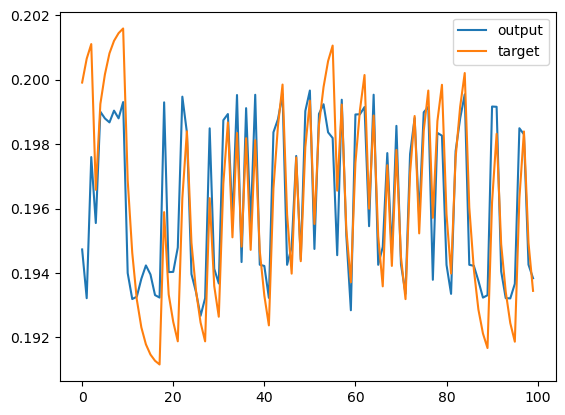

all long 0.4694174290194049
test performance: 0.4791225972370537, ratio: 0.5, task: Narma2, ac: 50
performance [0.52369598 0.46094696 0.45620938 0.46909762 0.4528913  0.49650339
 0.46884735 0.51833004 0.46167715 0.4830268 ]


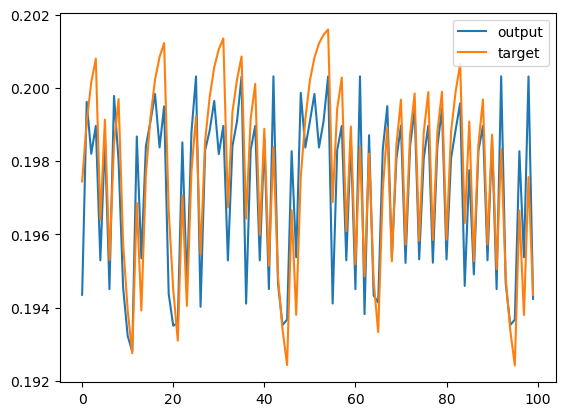

all long 0.6948571200069456
test performance: 0.7023577826190505, ratio: 0.5, task: Narma2, ac: 80
performance [0.57955718 0.78997778 0.74960289 0.6778982  0.57511203 0.68364859
 0.94323643 0.72923404 0.72572237 0.56958831]


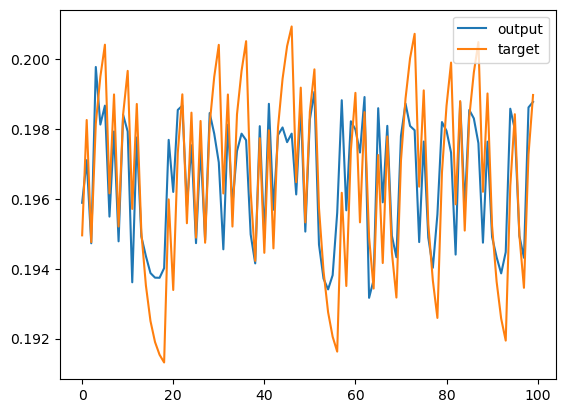

all long 0.8828531351660452
test performance: 0.8919847738912994, ratio: 0.5, task: Narma2, ac: 100
performance [0.82096052 0.73356489 0.77079304 1.14102419 0.87160617 0.96793454
 0.86652398 0.85990278 0.912355   0.97518263]


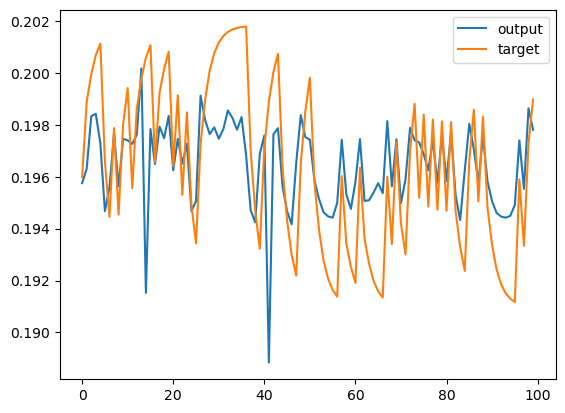

In [3]:
# data analyze
import efficient_training
import matplotlib.pyplot as plt
ac_list = [1, 30, 50, 80, 100]
for ac_value in ac_list:
    # efficient_training('radom_input_data', 4e-9, ac_current=ac_value, retrain=False)
    y_test, target = efficient_training.efficient_test_narma(consuming_time=4e-9, ac_current=ac_value, task='Narma2')
    plt.figure()
    plt.plot(y_test[0].T, label='output')
    plt.plot(target[0], label='target')
    plt.legend()
    plt.show()